In [1792]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [1793]:
df = pd.read_csv('G:/My Drive/MCD/4to Semestre/Desarrollo de Proyectos/Proyecto EDA/Mesa_Contract_K01_02.csv', encoding='latin-1',header=1)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

df.head()

,Contract_Name,Contract_No.,Contract_Status,Contract_Type,Vendor(Vendor)_Vendor_ID,Contract_Document_Code,Phase,City,Department_ID,Contract_Total_Amount,...,Contract_Duration,Revised_Timeline,State_State,Contract(Master_Contract)_Contract_No.,Project_Names,Type_of_Service,Project_Delivery_Method,Encumbrance/Not_to_Exceed_(MA),Award_Date,Award_Date_Award_Date
0,Job Order Master Transportation Talis Construc...,MA-F165-13000770Y3,Approved,Job Order Master,CNV570044,MA,104 - Construction,Tempe,F165,12000000.0,...,364.0,365,AZ,NaN,NaN,Construction,Job Order Contracting (JOC),0.0,NaN,NaN
1,CP1058 Mesa Center for Higher Education Second...,DO-F165-21006902,Approved,Project Order,CNV380229,DO,102 - Design,Mesa,F165,60151.0,...,60.0,61,AZ,MA-F165-21000157,Mesa Center for Higher Education Second Floor ...,Professional Service,NaN,0.0,NaN,NaN
2,CP0544 PSTF Training Track - Strand Associates...,DO-F165-20005557,Approved,Project Order,VS0000000886,DO,102 - Design,Phoenix,F165,112185.0,...,560.0,561,AZ,MA-F165-19000014R1,"MPSTF - Driving Track, MPSTF - Driving Track F...",Professional Service,NaN,112185.0,NaN,NaN
3,CP0695 Police Evidence Facility CMAR Pre-Const...,CT-F165-22000087,Approved,CMAR Pre-Construction Services Contract,VS0000011888,CT,102 - Design,Phoenix,F165,137380.0,...,321.0,322,AZ,NaN,"Police Evidence Facility, Police Evidence Faci...",Construction,Construction Manager at Risk (CMAR),0.0,NaN,NaN
4,JOC-EL20 Job Order Contract Master: Rosendin E...,MA-F165-21000129,Approved,Job Order Master,VS0000006927,MA,104 - Construction,San Jose,F165,3000000.0,...,365.0,366,CA,NaN,NaN,Construction,Job Order Contracting (JOC),3000000.0,NaN,NaN


In [1794]:
# Cconvergemos las dos columnas que fecha en una sola columna
date1 = pd.to_datetime(df['NTP_Date_Construction/Sign_Date_Design'])
date2 = pd.to_datetime(df['Award_Date_(Construction)_/_Sign_Date_(Design)'])

df['Signed_date'] = date1.combine_first(date2)

# Eliminamos contratos que tengan un valor menor a 2000 USD
df = df[df['Contract_Total_Amount'] >= 2000]


In [1795]:
df_invoice = pd.read_csv('G:/My Drive/MCD/4to Semestre/Desarrollo de Proyectos/Proyecto EDA/Invoice K02.csv', encoding='latin-1',header=0)

# Replace spaces with underscores in column names
df_invoice.columns = df_invoice.columns.str.replace(' ', '_')


df_invoice=df_invoice[['Invoice(Invoice_Auto_ID)_Invoice_No.','Contract(Contract_ID)_Contract_No.','Amount']]
df_invoice.columns = ["Invoice_No", "Contract_No","Invoice Ammount"]

df_invoice = df_invoice.groupby("Contract_No")["Invoice Ammount"].sum().reset_index()
df_invoice.columns = ["Contract_No.", "Invoice_Ammount"]

df = pd.merge(df, df_invoice, on="Contract_No.", how="left")
df

,Contract_Name,Contract_No.,Contract_Status,Contract_Type,Vendor(Vendor)_Vendor_ID,Contract_Document_Code,Phase,City,Department_ID,Contract_Total_Amount,...,State_State,Contract(Master_Contract)_Contract_No.,Project_Names,Type_of_Service,Project_Delivery_Method,Encumbrance/Not_to_Exceed_(MA),Award_Date,Award_Date_Award_Date,Signed_date,Invoice_Ammount
0,Job Order Master Transportation Talis Construc...,MA-F165-13000770Y3,Approved,Job Order Master,CNV570044,MA,104 - Construction,Tempe,F165,12000000.00,...,AZ,NaN,NaN,Construction,Job Order Contracting (JOC),0.00,NaN,NaN,2014-12-05,NaN
1,CP1058 Mesa Center for Higher Education Second...,DO-F165-21006902,Approved,Project Order,CNV380229,DO,102 - Design,Mesa,F165,60151.00,...,AZ,MA-F165-21000157,Mesa Center for Higher Education Second Floor ...,Professional Service,NaN,0.00,NaN,NaN,2021-04-01,NaN
2,CP0544 PSTF Training Track - Strand Associates...,DO-F165-20005557,Approved,Project Order,VS0000000886,DO,102 - Design,Phoenix,F165,112185.00,...,AZ,MA-F165-19000014R1,"MPSTF - Driving Track, MPSTF - Driving Track F...",Professional Service,NaN,112185.00,NaN,NaN,2020-01-15,NaN
3,CP0695 Police Evidence Facility CMAR Pre-Const...,CT-F165-22000087,Approved,CMAR Pre-Construction Services Contract,VS0000011888,CT,102 - Design,Phoenix,F165,137380.00,...,AZ,NaN,"Police Evidence Facility, Police Evidence Faci...",Construction,Construction Manager at Risk (CMAR),0.00,NaN,NaN,2022-02-23,NaN
4,JOC-EL20 Job Order Contract Master: Rosendin E...,MA-F165-21000129,Approved,Job Order Master,VS0000006927,MA,104 - Construction,San Jose,F165,3000000.00,...,CA,NaN,NaN,Construction,Job Order Contracting (JOC),3000000.00,NaN,NaN,2020-09-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,Master On-Call RENEWAL: Transportation - Dibble,MA-F165-15000191R1,Closed,Design Professional Master Contract,CNV241687,MA,102 - Design,Phoenix,F165,1000000.00,...,AZ,NaN,NaN,Professional Service,NaN,1000000.00,NaN,NaN,2015-10-16,NaN
2144,CP0433 Police Evidence Freezer Caliente Job Order,DO-F165-16005308,Approved,Job Order,VS0000000709,DO,104 - Construction,Tempe,F165,951850.28,...,AZ,MA-F165-15000199R1,Police Evidence Freezer 2013 Bond Authorization,Construction,Job Order Contracting (JOC),951850.28,NaN,NaN,NaT,951850.28
2145,CP0102 Fire Station 221 HDA Architects Design ...,CT-F165-19000102,Approved,Design Professional Services Contract,VS0000003290,CT,102 - Design,Gilbert,F165,493773.00,...,AZ,NaN,"Fire Station 221 Eastmark-Funding only, Fire S...",Professional Service,NaN,0.00,NaN,NaN,2019-03-13,NaN
2146,Master On-Call W/WW Pipelines - Black & Veatch,MA-F165-21000076R1,Approved,Job Order Master,CNV596655,MA,NaN,Kansas City,F165,1000000.00,...,MO,NaN,NaN,Construction,Job Order Contracting (JOC),0.00,NaN,NaN,2021-09-30,NaN


In [1796]:
# Create a DataFrame for master contracts
master_contracts = df[df["Contract(Master_Contract)_Contract_No."].isna()]
master_contracts = master_contracts[['Contract_No.','Contract_Status','Contract_Type','Contract_Total_Amount','Type_of_Service','Phase','Contract_Duration','Invoice_Ammount','Signed_date']]

In [1797]:
# Create a DataFrame for child contracts
child_contracts = df[df["Contract(Master_Contract)_Contract_No."].notna()]

# Calculate the number of child contracts for each master contract
child_counts = child_contracts["Contract(Master_Contract)_Contract_No."].value_counts().reset_index()
child_counts.columns = ["Contract_No.", "Number of Child Contracts"]

# Calculate the sum of contract amounts for child contracts
child_contract_amounts = child_contracts.groupby("Contract(Master_Contract)_Contract_No.")["Contract_Total_Amount"].sum().reset_index()
child_contract_amounts.columns = ["Contract_No.", "Child Contract Amounts"]

# Calculate the sum of contract Invouice amounts for child contracts
child_contract_InvoiceAmounts = child_contracts.groupby("Contract(Master_Contract)_Contract_No.")["Invoice_Ammount"].sum().reset_index()
child_contract_InvoiceAmounts.columns = ["Contract_No.", "C_Invoice_Ammount"]


In [1798]:


# Merge the dataframes to combine the information
result = pd.merge(master_contracts, child_counts, on="Contract_No.", how="left")
#result = result[result["Number of Child Contracts"].notna()]

df = pd.merge(result, child_contract_amounts, on="Contract_No.", how="left")
df = pd.merge(df, child_contract_InvoiceAmounts, on="Contract_No.", how="left")

# Fill None values with zeros using the fillna method
df['Invoice_Ammount'].fillna(0, inplace=True)
df['C_Invoice_Ammount'].fillna(0, inplace=True)

# Sum the two columns
df['Total_Invoice_Ammount'] = df['Invoice_Ammount'] + df['C_Invoice_Ammount']

df = df.drop(columns=['Invoice_Ammount','C_Invoice_Ammount'])

values_to_remove = ['In House Construction  No Contract','Consultant Standard Terms Contract','Project Order','Job Order']

# Remove rows containing the specific value(s)
df = df[~df['Contract_Type'].isin(values_to_remove)]

#df=df[df['Total_Invoice_Ammount'] > 0]

df

,Contract_No.,Contract_Status,Contract_Type,Contract_Total_Amount,Type_of_Service,Phase,Contract_Duration,Signed_date,Number of Child Contracts,Child Contract Amounts,Total_Invoice_Ammount
0,MA-F165-13000770Y3,Approved,Job Order Master,12000000.0,Construction,104 - Construction,364.0,2014-12-05,36.0,10277045.56,4533389.85
1,CT-F165-22000087,Approved,CMAR Pre-Construction Services Contract,137380.0,Construction,102 - Design,321.0,2022-02-23,NaN,NaN,0.00
2,MA-F165-21000129,Approved,Job Order Master,3000000.0,Construction,104 - Construction,365.0,2020-09-21,2.0,405343.85,0.00
3,MA-F165-21000089,Approved,Design Professional Master Contract,1000000.0,Professional Service,NaN,0.0,2020-10-15,3.0,427577.00,31775.75
4,MA-F165-14000254,Approved,Design Professional Master Contract,1000000.0,Professional Service,NaN,NaN,2011-12-22,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1194,MA-F165-15000206R1,Closed,Design Professional Master Contract,1000000.0,Professional Service,102 - Design,NaN,2015-11-02,1.0,27845.00,18536.25
1195,MA-F165-15000191R1,Closed,Design Professional Master Contract,1000000.0,Professional Service,102 - Design,NaN,2015-10-16,NaN,NaN,0.00
1196,CT-F165-19000102,Approved,Design Professional Services Contract,493773.0,Professional Service,102 - Design,900.0,2019-03-13,NaN,NaN,0.00
1197,MA-F165-21000076R1,Approved,Job Order Master,1000000.0,Construction,NaN,365.0,2021-09-30,NaN,NaN,0.00


In [1799]:
test = df.groupby("Phase")["Total_Invoice_Ammount"].sum().reset_index()
test

,Phase,Total_Invoice_Ammount
0,101 - Pre-Design,0.000000e+00
1,102 - Design,5.005674e+07
2,103 - Land Acq.,0.000000e+00
3,104 - Construction,2.998941e+08
4,105 - Construction Admin.,8.669656e+06
5,118 - Grant - Construction,6.135503e+06
6,120 - Direct Expenses,1.078162e+06


In [1800]:
test = df.groupby("Phase")["Contract_Total_Amount"].sum().reset_index()
test

,Phase,Contract_Total_Amount
0,101 - Pre-Design,1.000000e+06
1,102 - Design,4.778623e+08
2,103 - Land Acq.,3.917200e+04
3,104 - Construction,1.625574e+09
4,105 - Construction Admin.,9.085965e+06
5,118 - Grant - Construction,8.491645e+06
6,120 - Direct Expenses,6.039424e+06


In [1801]:
# Save the description of variables
description = df.iloc[0].to_dict()
description

{'Contract_No.': 'MA-F165-13000770Y3',
 'Contract_Status': 'Approved',
 'Contract_Type': 'Job Order Master',
 'Contract_Total_Amount': 12000000.0,
 'Type_of_Service': 'Construction',
 'Phase': '104 - Construction',
 'Contract_Duration': 364.0,
 'Signed_date': Timestamp('2014-12-05 00:00:00'),
 'Number of Child Contracts': 36.0,
 'Child Contract Amounts': 10277045.56,
 'Total_Invoice_Ammount': 4533389.85}

In [1802]:
# Variables
df.columns

Index(['Contract_No.', 'Contract_Status', 'Contract_Type',
       'Contract_Total_Amount', 'Type_of_Service', 'Phase',
       'Contract_Duration', 'Signed_date', 'Number of Child Contracts',
       'Child Contract Amounts', 'Total_Invoice_Ammount'],
      dtype='object')

In [1803]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Contract_No.               1154 non-null   object        
 1   Contract_Status            1154 non-null   object        
 2   Contract_Type              1154 non-null   object        
 3   Contract_Total_Amount      1154 non-null   float64       
 4   Type_of_Service            1154 non-null   object        
 5   Phase                      990 non-null    object        
 6   Contract_Duration          910 non-null    float64       
 7   Signed_date                1091 non-null   datetime64[ns]
 8   Number of Child Contracts  301 non-null    float64       
 9   Child Contract Amounts     301 non-null    float64       
 10  Total_Invoice_Ammount      1154 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 108.2+ KB


In [1804]:
## Variables cuantitativas
df.describe()

,Contract_Total_Amount,Contract_Duration,Number of Child Contracts,Child Contract Amounts,Total_Invoice_Ammount
count,1.154000e+03,910.000000,301.000000,3.010000e+02,1.154000e+03
mean,2.040357e+06,190.753846,3.152824,7.802532e+05,3.303872e+05
std,6.694681e+06,205.041617,4.254789,1.597634e+06,3.236526e+06
min,3.702000e+03,0.000000,1.000000,3.960000e+03,0.000000e+00
25%,2.500000e+05,0.000000,1.000000,5.894500e+04,0.000000e+00
50%,1.000000e+06,150.000000,2.000000,1.856120e+05,0.000000e+00
75%,1.000000e+06,365.000000,3.000000,4.701400e+05,9.033625e+03
max,1.702002e+08,1385.000000,36.000000,1.027705e+07,1.035412e+08


In [1805]:
# Número de términos únicos por variable
df.nunique()

Contract_No.                 1154
Contract_Status                 3
Contract_Type                   6
Contract_Total_Amount         488
Type_of_Service                 2
Phase                           7
Contract_Duration             147
Signed_date                   537
Number of Child Contracts      20
Child Contract Amounts        293
Total_Invoice_Ammount         312
dtype: int64

In [1806]:
# Revisar los missing values
df.isnull().sum()

Contract_No.                   0
Contract_Status                0
Contract_Type                  0
Contract_Total_Amount          0
Type_of_Service                0
Phase                        164
Contract_Duration            244
Signed_date                   63
Number of Child Contracts    853
Child Contract Amounts       853
Total_Invoice_Ammount          0
dtype: int64

In [1807]:
# fechas

df['Signed_date'] = pd.to_datetime(df['Signed_date'])

print("- El rango de fechas va desde {0} hasta {1}.".format(df['Signed_date'].min(), df['Signed_date'].max()))

- El rango de fechas va desde 2009-06-16 00:00:00 hasta 2022-11-10 00:00:00.


In [1808]:
# Tipos de Contratos
print("- En la base de datos se consideraron {0} tipos de contratos:".format(len(df.Contract_Status.unique())))
for i in df.Contract_Status.unique():
    print("    * "+i)

- En la base de datos se consideraron 3 tipos de contratos:
    * Approved
    * Closed
    * Estimate


In [1809]:
# Tipos de Contratos
print("- En la base de datos se consideraron {0} tipos de contratos:".format(len(df.Contract_Type.unique())))
for i in df.Contract_Type.unique():
    print("    * "+i)

- En la base de datos se consideraron 6 tipos de contratos:
    * Job Order Master
    * CMAR Pre-Construction Services Contract
    * Design Professional Master Contract
    * Design Professional Services Contract
    * Construction Services Contract for Design-Bid-Build Projects
    * CMAR Construction Services Contract


In [1810]:
# Faces de Contratos
unique_phase = df.Phase.unique()
print("- En la base de datos se consideraron {0} tipos de faces:".format(len(unique_phase)))
for Phase in unique_phase:
    print("    * " + str(Phase))

- En la base de datos se consideraron 8 tipos de faces:
    * 104 - Construction
    * 102 - Design
    * nan
    * 101 - Pre-Design
    * 103 - Land Acq.
    * 120 - Direct Expenses
    * 105 - Construction Admin.
    * 118 - Grant - Construction


In [1811]:
# Tipos de servicios
print("- En la base de datos se consideraron {0} tipos de servicios:".format(len(df.Type_of_Service.unique())))
for i in df.Type_of_Service.unique():
    print("    * "+i)

- En la base de datos se consideraron 2 tipos de servicios:
    * Construction
    * Professional Service


In [1812]:
# Valor de Contratos
print("- El rango de valor de contratos va de un min {0} hasta {1}, y su promedio es {2}".format(df.Contract_Total_Amount.unique().min(),
                                                                                      df.Contract_Total_Amount.unique().max(),
                                                                 np.round(pd.to_numeric(df.Contract_Total_Amount).mean(), 2)))

- El rango de valor de contratos va de un min 3702.0 hasta 170200176.8, y su promedio es 2040357.11


In [1813]:
# Valor de Facturas
print("- El rango de valor de contratos va de un min {0} hasta {1}, y su promedio es {2}".format(df.Total_Invoice_Ammount.unique().min(),
                                                                                      df.Total_Invoice_Ammount.unique().max(),
                                                                 np.round(pd.to_numeric(df.Total_Invoice_Ammount).mean(), 2)))

- El rango de valor de contratos va de un min 0.0 hasta 103541159.0, y su promedio es 330387.16


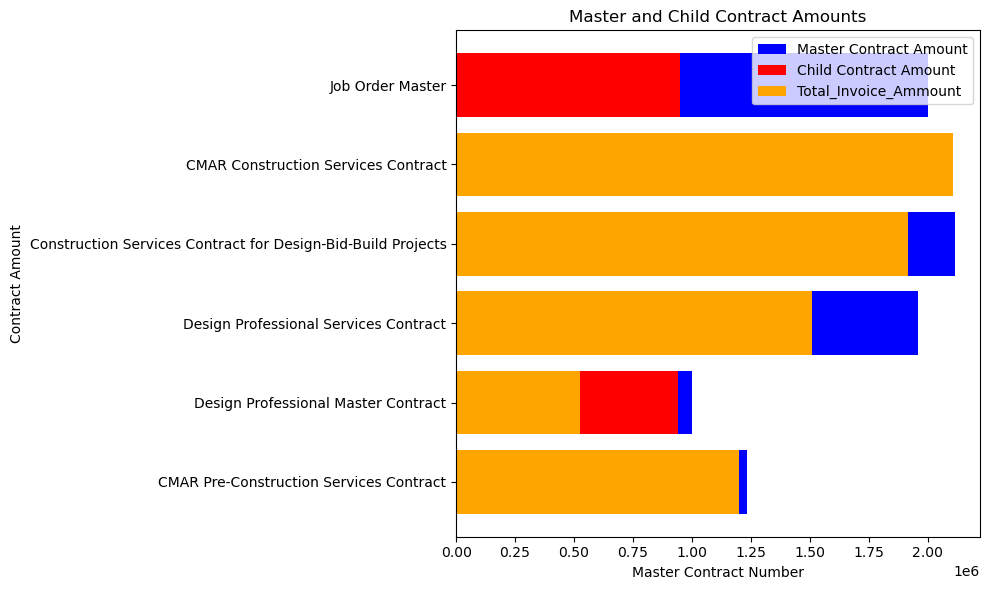

In [1837]:
# Create a bar graph with master contract and child contract amounts
plt.figure(figsize=(10, 6))

# Plot master contract amounts
plt.barh(df["Contract_Type"], df["Contract_Total_Amount"], label="Master Contract Amount", color="blue")
plt.barh(df["Contract_Type"], df["Child Contract Amounts"], label="Child Contract Amount", color="red")
# Plot child contract amounts on top of master contract amounts
plt.barh(df["Contract_Type"], df["Total_Invoice_Ammount"], label="Total_Invoice_Ammount", color="orange")



plt.xlabel("Master Contract Number")
plt.ylabel("Contract Amount")
plt.title("Master and Child Contract Amounts")
plt.legend()
plt.tight_layout()
plt.show()

In [1838]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Contract_Total_Amount'].quantile(0.25)
Q3 = df['Contract_Total_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Contract_Total_Amount'] < lower_bound) | (df['Contract_Total_Amount'] > upper_bound)]

# Remove outliers from the DataFrame
df = df[(df['Contract_Total_Amount'] >= lower_bound) & (df['Contract_Total_Amount'] <= upper_bound)]

# Display the DataFrame without outliers
print(df)

            Contract_No. Contract_Status  \
1       CT-F165-22000087        Approved   
3       MA-F165-21000089        Approved   
4       MA-F165-14000254        Approved   
5       CT-F165-16000121        Approved   
6     MA-F165-19000013R1        Approved   
...                  ...             ...   
1194  MA-F165-15000206R1          Closed   
1195  MA-F165-15000191R1          Closed   
1196    CT-F165-19000102        Approved   
1197  MA-F165-21000076R1        Approved   
1198  MA-F165-15000135R1          Closed   

                                Contract_Type  Contract_Total_Amount  \
1     CMAR Pre-Construction Services Contract              137380.00   
3         Design Professional Master Contract             1000000.00   
4         Design Professional Master Contract             1000000.00   
5       Design Professional Services Contract               36169.05   
6         Design Professional Master Contract             1000000.00   
...                                    

In [1839]:
source_contract = pd.DataFrame(df.Contract_Total_Amount.value_counts()).reset_index().rename(columns={"index":"Contract_Total_Amount", "Contract_Total_Amount":"Frequency"})

# price, general plot
alt.Chart(source_contract).mark_bar().encode(
    alt.X('Contract_Total_Amount', title="Contract_Total_Amount"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Contract_Total_Amount', legend=None),
    tooltip=['Contract_Total_Amount', 'Frequency']
).properties(title="Frecuencia de Valor de contrato",width=1000)

alt.Chart(...)

In [1840]:
# price, histogram
alt.Chart(source_contract).mark_bar().encode(
    alt.X('Contract_Total_Amount', bin=alt.Bin(maxbins=50), title="Contract_Total_Amount"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Contract_Total_Amount', bin=True),
    tooltip=['Contract_Total_Amount', 'Frequency']
).properties(title="Histograma de frecuencia de precios",width=1000)

alt.Chart(...)

In [1841]:
# price, density function
alt.Chart(source_contract).transform_density(
    'Contract_Total_Amount',
    as_=['Contract_Total_Amount', 'density'],
).mark_area().encode(
    alt.X("Contract_Total_Amount:Q", title="Precio"),
    alt.Y('density:Q', title="Probabilidad"),
    tooltip=['Contract_Total_Amount']
).properties(title="Distribución de densidad de precios",width=1000)

alt.Chart(...)

In [1842]:
source_ContractType = pd.DataFrame(df.Contract_Type.value_counts()).reset_index().rename(columns={"index":"Contract_Type", "Contract_Type":"Frequency"})
source_ContractType

,Contract_Type,Frequency
0,Design Professional Master Contract,524
1,Design Professional Services Contract,247
2,Construction Services Contract for Design-Bid-...,80
3,CMAR Pre-Construction Services Contract,47
4,CMAR Construction Services Contract,33
5,Job Order Master,25


In [1843]:
# Type fo contract, general plot
alt.Chart(source_ContractType).mark_bar().encode(
    alt.X('Contract_Type',  sort='-y'),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Contract_Type', legend=None),
    tooltip=['Contract_Type', 'Frequency']
).properties(title="Frecuencia de productos",width=1000)

alt.Chart(...)

In [1844]:
source_phase = pd.DataFrame(df.Phase.value_counts()).reset_index().rename(columns={"index":"Phase", "Phase":"Frequency"})
source_phase

,Phase,Frequency
0,102 - Design,644
1,104 - Construction,135
2,120 - Direct Expenses,13
3,118 - Grant - Construction,7
4,101 - Pre-Design,1
5,103 - Land Acq.,1
6,105 - Construction Admin.,1


In [1845]:
# price, general plot
alt.Chart(source_phase).mark_bar().encode(
    alt.X('Phase',  sort='-y', title="Categoría"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Phase', legend=None),
    tooltip=['Phase', 'Frequency']
).properties(title="Frecuencia de Phase")

alt.Chart(...)

In [1846]:
source_time = pd.pivot_table(df, index=["Signed_date", "Contract_Type"], values=["Contract_Total_Amount"], aggfunc=np.mean, fill_value=0).reset_index()
source_time

,Signed_date,Contract_Type,Contract_Total_Amount
0,2009-06-16,Design Professional Services Contract,281182.200
1,2009-11-05,Design Professional Services Contract,31986.160
2,2010-04-19,Design Professional Services Contract,82127.350
3,2011-12-22,Design Professional Master Contract,1000000.000
4,2012-06-11,Design Professional Master Contract,1000000.000
...,...,...,...
480,2022-10-15,Design Professional Master Contract,1000000.000
481,2022-10-19,CMAR Pre-Construction Services Contract,506466.065
482,2022-10-21,Design Professional Master Contract,1000000.000
483,2022-11-07,Construction Services Contract for Design-Bid-...,809600.000


In [1847]:
# Gráfica integrada
plot = alt.Chart(source_time).mark_line(size = 4).encode(
    alt.X('Signed_date:T', title="Fecha"),
    alt.Y('Contract_Total_Amount:Q', title="Contract_Total_Amount"),
    alt.Color('Contract_Type:N', title="Contract_Type")).properties(title="Precio promedio de productos a lo largo del tiempo",
                width=400, height=300
    )
plot

alt.Chart(...)

In [1848]:
# Gráfica por producto
plot.properties(width=200, height=200).facet(alt.Facet('Contract_Type:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Precio promedio por producto a lo largo del tiempo"], 
      "subtitle": ["Escalas independientes"],
      "color": "black",
      "subtitleColor": "grey"}
    )

alt.FacetChart(...)

In [1849]:
source_TypeService = pd.pivot_table(df, index=["Signed_date", "Type_of_Service"], values=["Contract_Total_Amount"],
                        aggfunc=np.mean, fill_value=0).reset_index()

source_TypeService

,Signed_date,Type_of_Service,Contract_Total_Amount
0,2009-06-16,Professional Service,281182.200
1,2009-11-05,Professional Service,31986.160
2,2010-04-19,Professional Service,82127.350
3,2011-12-22,Professional Service,1000000.000
4,2012-06-11,Professional Service,1000000.000
...,...,...,...
471,2022-10-15,Professional Service,1000000.000
472,2022-10-19,Construction,506466.065
473,2022-10-21,Professional Service,1000000.000
474,2022-11-07,Construction,809600.000


In [1850]:
# Gráfica integrada
plot = alt.Chart(source_TypeService).mark_line(size = 4).encode(
    alt.X('Signed_date:T', title="Fecha"),
    alt.Y('Contract_Total_Amount:Q', title="Precio"),
    alt.Color('Type_of_Service:N', title="Type_of_Service")).properties(title="Precio promedio por categoría a lo largo del tiempo",
                width=400, height=300
    )
plot

alt.Chart(...)

In [1851]:
# Gráfica por producto
plot.properties(width=500, height=200).facet(alt.Facet('Type_of_Service:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Precio promedio por categoría a lo largo del tiempo"], 
      "subtitle": ["Escalas independientes"],
      "color": "black",
      "subtitleColor": "grey"}         
)

alt.FacetChart(...)

In [1852]:
source_ProfServ = df[df.Type_of_Service=="Professional Service"].reset_index()

# para la gráfica cree dos variables nuevas: mes y año
source_ProfServ['year'] = pd.DatetimeIndex(source_ProfServ['Signed_date']).year
source_ProfServ['month'] = pd.DatetimeIndex(source_ProfServ['Signed_date']).month
print("\nLa categoría 'meat, fish and eggs' tiene un total de", len(source_ProfServ), "registros.\n")
source.head()


La categoría 'meat, fish and eggs' tiene un total de 771 registros.



,Contract_Type,Type_of_Service,year,Contract_Total_Amount
0,CMAR Construction Services Contract,Construction,2014.0,2.861923e+06
1,CMAR Construction Services Contract,Construction,2015.0,5.390095e+06
2,CMAR Construction Services Contract,Construction,2016.0,1.179402e+07
3,CMAR Construction Services Contract,Construction,2017.0,1.948830e+07
4,CMAR Construction Services Contract,Construction,2018.0,4.048048e+06


In [1853]:
alt.Chart(source_ProfServ).mark_rect().encode(
    alt.X("month:O", title = "Mes", axis = alt.Axis(labelAngle = 0)),
    alt.Y('year:O', title = "Año", sort="-y"),
    alt.Color('Contract_Total_Amount:Q', title = "Contract_Total_Amount"),
    tooltip=['year', 'month', 'Contract_Total_Amount']
).properties(title={
    "text": ["Precios de categoría proteínas"], 
    "subtitle": ["category: 'meat, fish and eggs'"],
    "color": "black",
    "subtitleColor": "grey"},
             width=400, height=200)

alt.Chart(...)

In [1854]:
source_Const = df[df.Type_of_Service=="Construction"].reset_index()

# para la gráfica cree dos variables nuevas: mes y año
source_Const['year'] = pd.DatetimeIndex(source_Const['Signed_date']).year
source_Const['month'] = pd.DatetimeIndex(source_Const['Signed_date']).month
print("\nLa categoría 'meat, fish and eggs' tiene un total de", len(source_Const), "registros.\n")
source.head()


La categoría 'meat, fish and eggs' tiene un total de 185 registros.



,Contract_Type,Type_of_Service,year,Contract_Total_Amount
0,CMAR Construction Services Contract,Construction,2014.0,2.861923e+06
1,CMAR Construction Services Contract,Construction,2015.0,5.390095e+06
2,CMAR Construction Services Contract,Construction,2016.0,1.179402e+07
3,CMAR Construction Services Contract,Construction,2017.0,1.948830e+07
4,CMAR Construction Services Contract,Construction,2018.0,4.048048e+06


In [1855]:
alt.Chart(source_Const).mark_rect().encode(
    alt.X("month:O", title = "Mes", axis = alt.Axis(labelAngle = 0)),
    alt.Y('year:O', title = "Año", sort="-y"),
    alt.Color('Contract_Total_Amount:Q', title = "Contract_Total_Amount"),
    tooltip=['year', 'month', 'Contract_Total_Amount']
).properties(title={
    "text": ["Precios de categoría proteínas"], 
    "subtitle": ["category: 'meat, fish and eggs'"],
    "color": "black",
    "subtitleColor": "grey"},
             width=400, height=200)

alt.Chart(...)

In [1856]:
source = df.reset_index()
source['year'] = pd.DatetimeIndex(source['Signed_date']).year
source = pd.pivot_table(source, index=["Contract_Type", "Type_of_Service", "year"], values=["Contract_Total_Amount"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,Contract_Type,Type_of_Service,year,Contract_Total_Amount
0,CMAR Construction Services Contract,Construction,2014.0,1.247064e+06
1,CMAR Construction Services Contract,Construction,2015.0,1.839648e+06
2,CMAR Construction Services Contract,Construction,2016.0,1.314035e+06
3,CMAR Construction Services Contract,Construction,2017.0,4.892377e+05
4,CMAR Construction Services Contract,Construction,2019.0,1.048531e+06
5,CMAR Construction Services Contract,Construction,2020.0,4.337035e+05
6,CMAR Construction Services Contract,Construction,2021.0,7.850981e+05
7,CMAR Construction Services Contract,Construction,2022.0,1.543955e+06
8,CMAR Pre-Construction Services Contract,Construction,2014.0,3.114085e+04
9,CMAR Pre-Construction Services Contract,Construction,2015.0,5.235158e+05


In [1857]:
alt.Chart(source).mark_point(opacity=0.8, size=100).encode(
    alt.X("Contract_Total_Amount", title = "Contract_Total_Amount", axis = alt.Axis(labelAngle = 0)),
    alt.Y('Contract_Type', title = "Contract_Type", sort="-y"),
    alt.Shape('Type_of_Service:N', title="Type_of_Service"),
    alt.Color('year:N', title="Año"),
    tooltip=['Type_of_Service', 'Contract_Type', 'year', 'Contract_Total_Amount']
).properties(title="Precios de productos por categoría y año", width=400, height=400)

alt.Chart(...)

In [1858]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Contract_Total_Amount'].quantile(0.25)
Q3 = df['Contract_Total_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Contract_Total_Amount'] < lower_bound) | (df['Contract_Total_Amount'] > upper_bound)]

# Remove outliers from the DataFrame
df = df[(df['Contract_Total_Amount'] >= lower_bound) & (df['Contract_Total_Amount'] <= upper_bound)]

# Display the DataFrame without outliers
print(df)

            Contract_No. Contract_Status  \
1       CT-F165-22000087        Approved   
3       MA-F165-21000089        Approved   
4       MA-F165-14000254        Approved   
5       CT-F165-16000121        Approved   
6     MA-F165-19000013R1        Approved   
...                  ...             ...   
1194  MA-F165-15000206R1          Closed   
1195  MA-F165-15000191R1          Closed   
1196    CT-F165-19000102        Approved   
1197  MA-F165-21000076R1        Approved   
1198  MA-F165-15000135R1          Closed   

                                Contract_Type  Contract_Total_Amount  \
1     CMAR Pre-Construction Services Contract              137380.00   
3         Design Professional Master Contract             1000000.00   
4         Design Professional Master Contract             1000000.00   
5       Design Professional Services Contract               36169.05   
6         Design Professional Master Contract             1000000.00   
...                                    

In [1859]:
# gráfica básica
alt.Chart(df).mark_circle().encode(
    x="Contract_Total_Amount:Q",
    y='Contract_Duration:Q',
    color="Type_of_Service:N",
)

alt.Chart(...)